## **AUGMENTED TRAIN**

In [ ]:
import os
import scipy.io as sio
import numpy as np
import pywt
import matplotlib.pyplot as plt

# ============================================================
# PATHS
# ============================================================
INPUT_DIR = r"E:\PROJECTS\CARDIAC-PROJECT-UPDATED\DATASET\5-AUGMENTED_DATA\train"
OUTPUT_DIR = r"E:\PROJECTS\CARDIAC-PROJECT-UPDATED\DATASET\6-SCALOGRAMS\train"

IMG_SIZE = (224, 224)
DPI = 100

os.makedirs(os.path.join(OUTPUT_DIR, "ecg"), exist_ok=True)
os.makedirs(os.path.join(OUTPUT_DIR, "pcg"), exist_ok=True)

# ============================================================
# WAVELET SETTINGS (LOCKED)
# ============================================================

ECG_WAVELET = "cmor1.5-1.0"
ECG_SCALES = np.arange(20, 501)

PCG_WAVELET = "morl"
PCG_SCALES = np.arange(7, 131)

# ============================================================
# SCALOGRAM FUNCTION
# ============================================================
def generate_cwt(signal, scales, wavelet, fs):
    coeffs, _ = pywt.cwt(
        signal,
        scales,
        wavelet,
        sampling_period=1.0 / fs
    )
    return np.abs(coeffs)

# ============================================================
# MAIN LOOP
# ============================================================
for file in os.listdir(INPUT_DIR):
    if not file.endswith(".mat"):
        continue

    out_ecg = os.path.join(OUTPUT_DIR, "ecg", file.replace(".mat", ".png"))
    out_pcg = os.path.join(OUTPUT_DIR, "pcg", file.replace(".mat", ".png"))

    # Skip already processed
    if os.path.exists(out_ecg) and os.path.exists(out_pcg):
        print(f"Skipping {file} (already processed)")
        continue

    # -------- LOAD DATA --------
    mat_path = os.path.join(INPUT_DIR, file)
    data = sio.loadmat(mat_path)

    ecg = data["ecg"].squeeze()
    pcg = data["pcg"].squeeze()
    fs  = int(data["fs"][0][0])

    # ---------------- ECG SCALOGRAM ----------------
    ecg_cwt = generate_cwt(ecg, ECG_SCALES, ECG_WAVELET, fs)

    plt.figure(figsize=(IMG_SIZE[0]/DPI, IMG_SIZE[1]/DPI), dpi=DPI)
    plt.imshow(ecg_cwt, aspect="auto", cmap="jet", origin="lower")
    plt.axis("off")
    plt.savefig(out_ecg, bbox_inches="tight", pad_inches=0)
    plt.close()

    # ---------------- PCG SCALOGRAM ----------------
    pcg_cwt = generate_cwt(pcg, PCG_SCALES, PCG_WAVELET, fs)

    plt.figure(figsize=(IMG_SIZE[0]/DPI, IMG_SIZE[1]/DPI), dpi=DPI)
    plt.imshow(pcg_cwt, aspect="auto", cmap="jet", origin="lower")
    plt.axis("off")
    plt.savefig(out_pcg, bbox_inches="tight", pad_inches=0)
    plt.close()

print("✅ Scalogram generation complete (TRAIN)")


Skipping a0001_seg000_mix.mat (already processed)
Skipping a0001_seg000_noise.mat (already processed)
Skipping a0001_seg000_orig.mat (already processed)
Skipping a0001_seg000_scale.mat (already processed)
Skipping a0001_seg001_mix.mat (already processed)
Skipping a0001_seg001_noise.mat (already processed)
Skipping a0001_seg001_orig.mat (already processed)
Skipping a0001_seg001_scale.mat (already processed)
Skipping a0001_seg002_mix.mat (already processed)
Skipping a0001_seg002_noise.mat (already processed)
Skipping a0001_seg002_orig.mat (already processed)
Skipping a0001_seg002_scale.mat (already processed)
Skipping a0001_seg003_mix.mat (already processed)
Skipping a0001_seg003_noise.mat (already processed)
Skipping a0001_seg003_orig.mat (already processed)
Skipping a0001_seg003_scale.mat (already processed)
Skipping a0001_seg004_mix.mat (already processed)
Skipping a0001_seg004_noise.mat (already processed)
Skipping a0001_seg004_orig.mat (already processed)
Skipping a0001_seg004_scale

## **TEST**

In [3]:
import os
import scipy.io as sio
import numpy as np
import pywt
import matplotlib.pyplot as plt

# ============================================================
# PATHS
# ============================================================
INPUT_DIR = r"E:\PROJECTS\CARDIAC-PROJECT-UPDATED\DATASET\4-SEGMENTED_DATA\test"
OUTPUT_DIR = r"E:\PROJECTS\CARDIAC-PROJECT-UPDATED\DATASET\6-SCALOGRAMS\test"

IMG_SIZE = (224, 224)
DPI = 100

os.makedirs(OUTPUT_DIR, exist_ok=True)
os.makedirs(os.path.join(OUTPUT_DIR, "ecg"), exist_ok=True)
os.makedirs(os.path.join(OUTPUT_DIR, "pcg"), exist_ok=True)

# ============================================================
# WAVELET SETTINGS (SAME AS TRAIN)
# ============================================================

# ECG
ECG_WAVELET = "cmor1.5-1.0"
ECG_SCALES = np.arange(20, 501)

# PCG
PCG_WAVELET = "morl"
PCG_SCALES = np.arange(7, 131)

# ============================================================
# SCALOGRAM FUNCTION
# ============================================================
def generate_cwt(signal, scales, wavelet, fs):
    coeffs, _ = pywt.cwt(
        signal,
        scales,
        wavelet,
        sampling_period=1.0 / fs
    )
    return np.abs(coeffs)

# ============================================================
# MAIN LOOP
# ============================================================
for file in os.listdir(INPUT_DIR):
    if not file.endswith(".mat"):
        continue

    out_ecg = os.path.join(
        OUTPUT_DIR, "ecg", file.replace(".mat", ".png")
    )
    out_pcg = os.path.join(
        OUTPUT_DIR, "pcg", file.replace(".mat", ".png")
    )

    # ---------------- SKIP IF ALREADY DONE ----------------
    if os.path.exists(out_ecg) and os.path.exists(out_pcg):
        print(f"Skipping {file} (already processed)")
        continue

    # -------- LOAD DATA --------
    mat_path = os.path.join(INPUT_DIR, file)
    data = sio.loadmat(mat_path)

    ecg = data["ecg"].squeeze()
    pcg = data["pcg"].squeeze()
    fs  = int(data["fs"][0][0])

    # ---------------- ECG SCALOGRAM ----------------
    ecg_cwt = generate_cwt(ecg, ECG_SCALES, ECG_WAVELET, fs)

    plt.figure(figsize=(IMG_SIZE[0]/DPI, IMG_SIZE[1]/DPI), dpi=DPI)
    plt.imshow(ecg_cwt, aspect="auto", cmap="jet", origin="lower")
    plt.axis("off")

    plt.savefig(
        os.path.join(OUTPUT_DIR, "ecg", file.replace(".mat", ".png")),
        bbox_inches="tight",
        pad_inches=0
    )
    plt.close()

    # ---------------- PCG SCALOGRAM ----------------
    pcg_cwt = generate_cwt(pcg, PCG_SCALES, PCG_WAVELET, fs)

    plt.figure(figsize=(IMG_SIZE[0]/DPI, IMG_SIZE[1]/DPI), dpi=DPI)
    plt.imshow(pcg_cwt, aspect="auto", cmap="jet", origin="lower")
    plt.axis("off")

    plt.savefig(
        os.path.join(OUTPUT_DIR, "pcg", file.replace(".mat", ".png")),
        bbox_inches="tight",
        pad_inches=0
    )
    plt.close()

print("✅ Scalogram generation complete (TEST)")


✅ Scalogram generation complete (TEST)


## **VISUALIZATION**

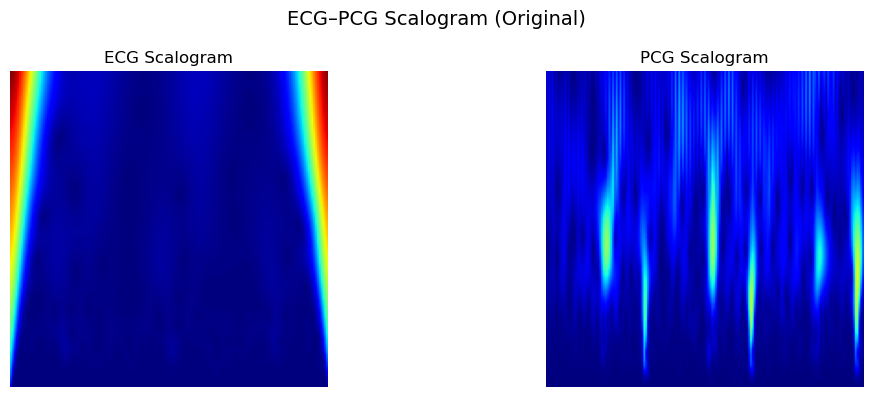

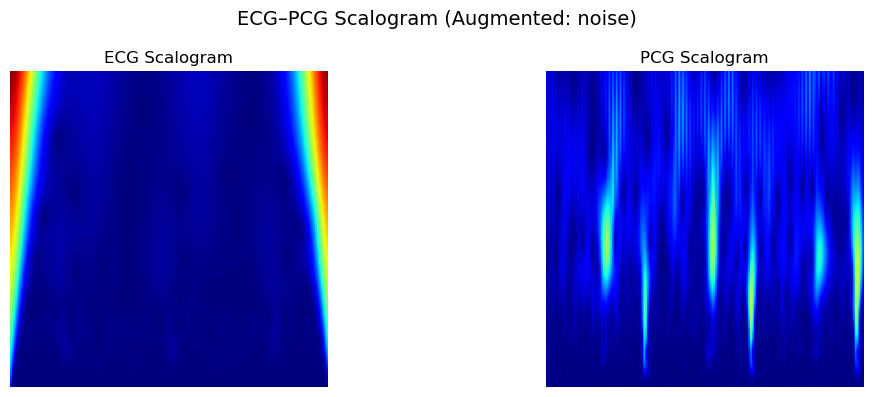

In [3]:
import matplotlib.pyplot as plt
from pathlib import Path
import matplotlib.image as mpimg

def visualize_scalogram_pair(ecg_img_path, pcg_img_path, title_suffix=""):
    ecg_img = mpimg.imread(ecg_img_path)
    pcg_img = mpimg.imread(pcg_img_path)

    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    axes[0].imshow(ecg_img)
    axes[0].set_title("ECG Scalogram")
    axes[0].axis("off")

    axes[1].imshow(pcg_img)
    axes[1].set_title("PCG Scalogram")
    axes[1].axis("off")

    plt.suptitle(f"ECG–PCG Scalogram {title_suffix}", fontsize=14)
    plt.tight_layout()
    plt.show()


def visualize_scalogram_augmentation(
    ecg_dir,
    pcg_dir,
    base_name,
    aug_type
):
    ecg_orig = Path(ecg_dir) / f"{base_name}_orig.png"
    pcg_orig = Path(pcg_dir) / f"{base_name}_orig.png"

    ecg_aug = Path(ecg_dir) / f"{base_name}_{aug_type}.png"
    pcg_aug = Path(pcg_dir) / f"{base_name}_{aug_type}.png"

    visualize_scalogram_pair(ecg_orig, pcg_orig, "(Original)")
    visualize_scalogram_pair(ecg_aug, pcg_aug, f"(Augmented: {aug_type})")

visualize_scalogram_augmentation(
    ecg_dir=r"E:\PROJECTS\CARDIAC-PROJECT-UPDATED\DATASET\6-SCALOGRAMS\train\ecg",
    pcg_dir=r"E:\PROJECTS\CARDIAC-PROJECT-UPDATED\DATASET\6-SCALOGRAMS\train\pcg",
    base_name="a0001_seg001",
    aug_type="noise"
)



### **Interpretation: ECG–PCG Scalograms**

The ECG scalogram shows dominant energy localized at lower scales, with distinct vertical ridges corresponding to QRS complexes, indicating correct capture of cardiac electrical activity. The predominantly low-energy background reflects the low-frequency nature of ECG signals.

The PCG scalogram exhibits time-localized, high-energy vertical patterns corresponding to heart sound events (S1/S2), with a broader frequency distribution compared to ECG, consistent with acoustic signal characteristics.

Augmented scalograms preserve the original time–frequency structure while introducing mild texture variations, confirming that augmentation does not distort physiologically relevant patterns and is suitable for CNN-based learning.


### **Cleaning Augmented Train Scalogram**

In [2]:
import os

# ------------------------------------------------
# Scalogram directories
# ------------------------------------------------
SCALO_DIR = r"E:\PROJECTS\CARDIAC-PROJECT-UPDATED\DATASET\6-SCALOGRAMS\train"
ECG_DIR = os.path.join(SCALO_DIR, "ecg")
PCG_DIR = os.path.join(SCALO_DIR, "pcg")

# ------------------------------------------------
# Base segment IDs with invalid PCG (NO suffix)
# ------------------------------------------------
invalid_base_segments = [
    "a0014_seg000","a0014_seg001","a0014_seg002","a0014_seg003","a0014_seg004",
    "a0014_seg005","a0014_seg006","a0014_seg007","a0014_seg008","a0014_seg009",

    "a0027_seg000","a0027_seg001","a0027_seg002","a0027_seg003","a0027_seg004",
    "a0027_seg005","a0027_seg006","a0027_seg007","a0027_seg008",

    "a0028_seg000","a0028_seg001","a0028_seg002","a0028_seg003","a0028_seg004",
    "a0028_seg005","a0028_seg006","a0028_seg007","a0028_seg008",

    "a0045_seg000","a0045_seg001","a0045_seg002","a0045_seg003","a0045_seg004",
    "a0045_seg005","a0045_seg006","a0045_seg007","a0045_seg008","a0045_seg009",

    "a0055_seg000","a0055_seg001","a0055_seg002","a0055_seg003","a0055_seg004",
    "a0055_seg005","a0055_seg006","a0055_seg007","a0055_seg008","a0055_seg009",
    "a0055_seg010",

    "a0057_seg000","a0057_seg001","a0057_seg002","a0057_seg003","a0057_seg004",
    "a0057_seg005","a0057_seg006","a0057_seg007","a0057_seg008","a0057_seg009",
    "a0057_seg010",

    "a0068_seg000","a0068_seg001","a0068_seg002","a0068_seg003","a0068_seg004",
    "a0068_seg005","a0068_seg006","a0068_seg007","a0068_seg008","a0068_seg009",
    "a0068_seg010",

    "a0070_seg000","a0070_seg001","a0070_seg002","a0070_seg003","a0070_seg004",
    "a0070_seg005","a0070_seg006","a0070_seg007",

    "a0075_seg000","a0075_seg001","a0075_seg002","a0075_seg003","a0075_seg004",
    "a0075_seg005","a0075_seg006","a0075_seg007","a0075_seg008",

    "a0118_seg000","a0118_seg001","a0118_seg002","a0118_seg003","a0118_seg004",
    "a0118_seg005","a0118_seg006","a0118_seg007","a0118_seg008",

    "a0160_seg000","a0160_seg001","a0160_seg002","a0160_seg003","a0160_seg004",
    "a0160_seg005","a0160_seg006","a0160_seg007","a0160_seg008","a0160_seg009",

    "a0163_seg000","a0163_seg001","a0163_seg002","a0163_seg003","a0163_seg004",
    "a0163_seg005","a0163_seg006","a0163_seg007","a0163_seg008",

    "a0179_seg000","a0179_seg001","a0179_seg002","a0179_seg003","a0179_seg004",
    "a0179_seg005","a0179_seg006","a0179_seg007","a0179_seg008",

    "a0250_seg000","a0250_seg001","a0250_seg002","a0250_seg003","a0250_seg004",
    "a0250_seg005","a0250_seg006","a0250_seg007","a0250_seg008",

    "a0274_seg000","a0274_seg001","a0274_seg002","a0274_seg003","a0274_seg004",
    "a0274_seg005","a0274_seg006","a0274_seg007","a0274_seg008","a0274_seg009",
    "a0274_seg010",

    "a0303_seg000","a0303_seg001","a0303_seg002","a0303_seg003","a0303_seg004",
    "a0303_seg005","a0303_seg006","a0303_seg007","a0303_seg008","a0303_seg009",

    "a0315_seg000","a0315_seg001","a0315_seg002","a0315_seg003","a0315_seg004",
    "a0315_seg005",

    "a0361_seg000","a0361_seg001","a0361_seg002","a0361_seg003","a0361_seg004",
    "a0361_seg005","a0361_seg006","a0361_seg007",

    "a0395_seg000","a0395_seg001","a0395_seg002","a0395_seg003"
]

# ------------------------------------------------
# Remove scalograms (if they exist)
# ------------------------------------------------
removed = 0

for base in invalid_base_segments:
    for suffix in ["_orig.png", "_noise.png", "_scale.png", "_mix.png"]:
        ecg_file = os.path.join(ECG_DIR, base + suffix)
        pcg_file = os.path.join(PCG_DIR, base + suffix)

        if os.path.exists(ecg_file):
            os.remove(ecg_file)
            removed += 1
            print(f"Removed ECG: {os.path.basename(ecg_file)}")

        if os.path.exists(pcg_file):
            os.remove(pcg_file)
            removed += 1
            print(f"Removed PCG: {os.path.basename(pcg_file)}")

print(f"\n✅ Total scalogram images removed: {removed}")


Removed ECG: a0014_seg000_orig.png
Removed PCG: a0014_seg000_orig.png
Removed ECG: a0014_seg000_noise.png
Removed PCG: a0014_seg000_noise.png
Removed ECG: a0014_seg000_scale.png
Removed PCG: a0014_seg000_scale.png
Removed ECG: a0014_seg000_mix.png
Removed PCG: a0014_seg000_mix.png
Removed ECG: a0014_seg001_orig.png
Removed PCG: a0014_seg001_orig.png
Removed ECG: a0014_seg001_noise.png
Removed PCG: a0014_seg001_noise.png
Removed ECG: a0014_seg001_scale.png
Removed PCG: a0014_seg001_scale.png
Removed ECG: a0014_seg001_mix.png
Removed PCG: a0014_seg001_mix.png
Removed ECG: a0014_seg002_orig.png
Removed PCG: a0014_seg002_orig.png
Removed ECG: a0014_seg002_noise.png
Removed PCG: a0014_seg002_noise.png
Removed ECG: a0014_seg002_scale.png
Removed PCG: a0014_seg002_scale.png
Removed ECG: a0014_seg002_mix.png
Removed PCG: a0014_seg002_mix.png
Removed ECG: a0014_seg003_orig.png
Removed PCG: a0014_seg003_orig.png
Removed ECG: a0014_seg003_noise.png
Removed PCG: a0014_seg003_noise.png
Removed ECG: